In [4]:
# Step 1: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import xgboost as xgb


In [5]:
import pandas as pd

# Load your dataset
df = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/ML/GBT/Loan_default.csv')  # Replace with your file path
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [8]:
# clean

In [9]:
# Drop columns not useful for prediction
df.drop(['ID'], axis=1, inplace=True)

# Handle missing values if any
df.fillna(method='ffill', inplace=True)


In [ ]:
#feature Engineering & Encoding

In [10]:
# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns

# Encode using LabelEncoder (for simplicity, use OneHotEncoder for tree-based if needed)
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Ensure Status is the target and numeric
df['Status'] = df['Status'].astype(int)


In [ ]:
# Train-Test Split

In [11]:
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     22494
           1       0.95      0.78      0.86      7240

    accuracy                           0.94     29734
   macro avg       0.94      0.88      0.91     29734
weighted avg       0.94      0.94      0.93     29734

Confusion Matrix:
[[22171   323]
 [ 1564  5676]]


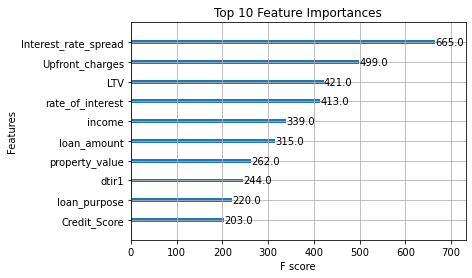

In [14]:
xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()


In [ ]:
# gasph 

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np


In [17]:
# Binarize the output (for multi-class AUC-ROC)
classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

# Split again to get binary y for ROC
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)


In [18]:
model = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
model.fit(X_train, y_train_bin)
y_score = model.predict_proba(X_test)


Text(0.5, 0, 'False Positive Rate')

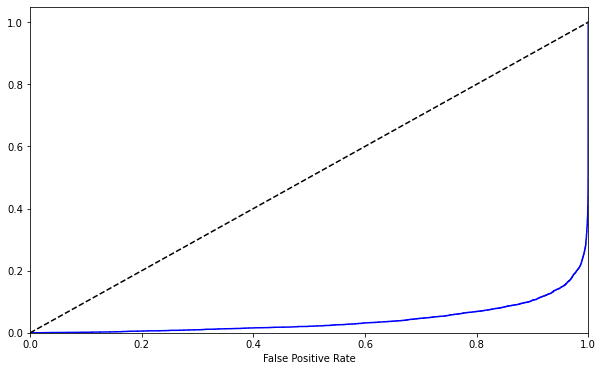

In [19]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 6))

colors = ['blue', 'red', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
